In [2]:
#import the libraries
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

Define start day to fetch the dataset from the yahoo finance library


In [3]:

START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
data = load_data('TCS.NS')
df=data
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,282.049591,284.770085,281.073952,283.231585,1963682
1,2010-01-05,282.124786,285.014145,280.136015,283.306804,2014488
2,2010-01-06,275.745636,282.256076,275.051450,282.124728,3349176
3,2010-01-07,268.071869,277.452883,266.796042,275.989436,6474892
4,2010-01-08,262.593414,269.610419,261.355125,268.672318,6048178


In [7]:
df = df.drop(['Date'], axis = 1)
df.head()

<ipython-input-7-e54f1e21f52c>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,282.049591,284.770085,281.073952,283.231585,1963682
1,282.124786,285.014145,280.136015,283.306804,2014488
2,275.745636,282.256076,275.051450,282.124728,3349176
3,268.071869,277.452883,266.796042,275.989436,6474892
4,262.593414,269.610419,261.355125,268.672318,6048178


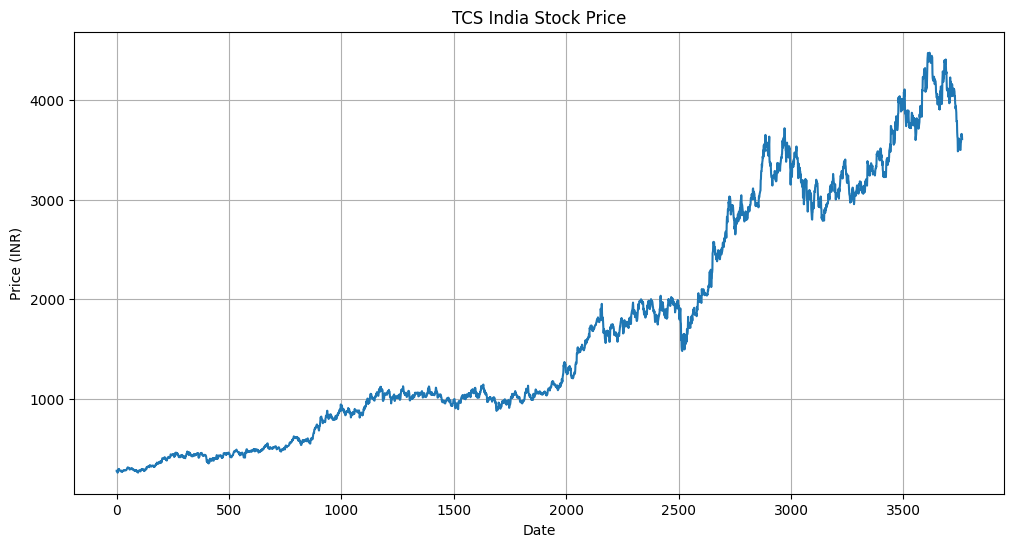

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [9]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,282.049591,284.770085,281.073952,283.231585,1963682
1,282.124786,285.014145,280.136015,283.306804,2014488
2,275.745636,282.256076,275.051450,282.124728,3349176
3,268.071869,277.452883,266.796042,275.989436,6474892
4,262.593414,269.610419,261.355125,268.672318,6048178
...,...,...,...,...,...
3757,3628.949951,3649.750000,3566.600098,3600.000000,1834751
3758,3657.750000,3710.000000,3638.000000,3645.000000,3135390
3759,3635.800049,3680.500000,3625.850098,3647.750000,1734499


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3757,3999.901472
3758,3996.273386
3759,3993.569565
3760,3990.864717


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

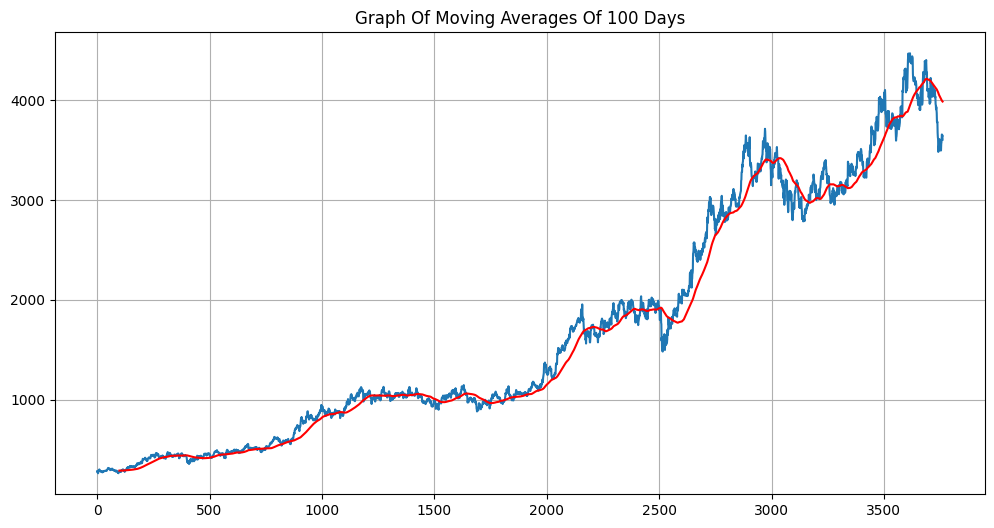

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3757,4063.725648
3758,4063.252362
3759,4062.358046
3760,4061.713390


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

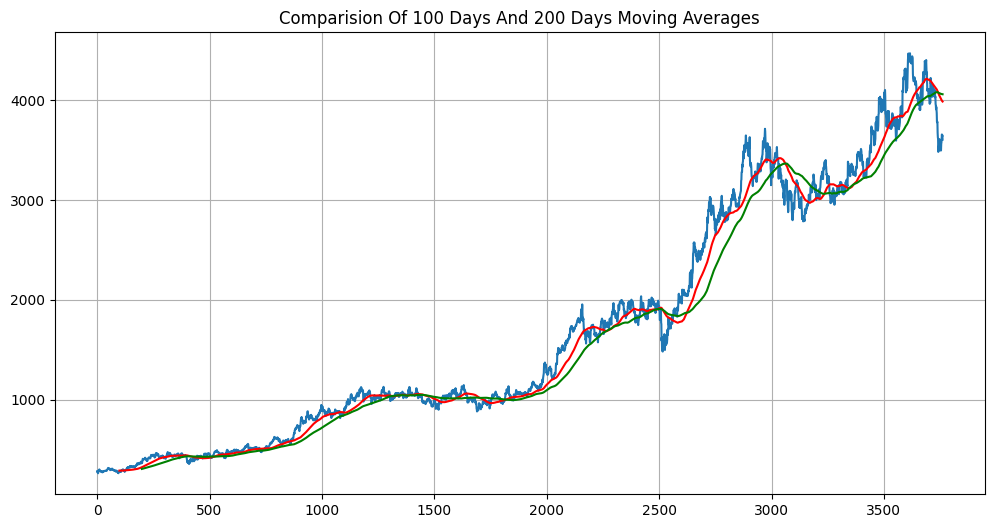

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [14]:
df.shape

(3762, 5)

In [15]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2633, 6)
(1129, 6)


In [16]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,282.049591,284.770085,281.073952,283.231585,1963682
1,2010-01-05,282.124786,285.014145,280.136015,283.306804,2014488
2,2010-01-06,275.745636,282.256076,275.051450,282.124728,3349176
3,2010-01-07,268.071869,277.452883,266.796042,275.989436,6474892
4,2010-01-08,262.593414,269.610419,261.355125,268.672318,6048178


In [17]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2633,2020-09-08,2137.731445,2176.194590,2118.477203,2126.579409,7453998
2634,2020-09-09,2119.023682,2147.563884,2112.059437,2116.611289,3866535
2635,2020-09-10,2122.209961,2138.004977,2115.974057,2125.714976,2308813
2636,2020-09-11,2161.310547,2169.412755,2121.299588,2122.027929,4145424
2637,2020-09-14,2268.096924,2281.160829,2168.366016,2170.414349,7512131


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [20]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01032579],
       [0.01036654],
       [0.00972622],
       ...,
       [0.97534326],
       [0.97879508],
       [0.98569897]])

In [21]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(2533, 100, 1)

In [23]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#Training the model
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 252ms/step - loss: 0.0845 - mean_absolute_error: 0.2041
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 255ms/step - loss: 0.0083 - mean_absolute_error: 0.0609
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 246ms/step - loss: 0.0073 - mean_absolute_error: 0.0596
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - loss: 0.0062 - mean_absolute_error: 0.0532
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 253ms/step - loss: 0.0086 - mean_absolute_error: 0.0644
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 242ms/step - loss: 0.0050 - mean_absolute_error: 0.0468
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 258ms/step - loss: 0.0051 - mean_absolute_error: 0.0486
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 43s 282ms/step - loss: 0.0049 - mean_absolute_error: 0.0465
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 285ms/step - loss: 0.0042 - mean_absolute_error: 0.0442
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 251ms/step - loss: 0.0043 - mean_absolute_error: 0.0432
Epoch 11/

In [27]:
model.save('keras_model.h5')

In [28]:
test_close.shape

(1129, 1)

In [29]:
past_100_days = pd.DataFrame(train_close[-100:])

In [30]:
test_df = pd.DataFrame(test_close)

Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.

In [32]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [33]:
final_df.head()

,0
0,1630.207030
1,1657.377486
2,1598.508470
3,1573.738520
4,1612.093785


In [34]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01934185],
       [0.0286484 ],
       [0.00848432],
       ...,
       [0.71039989],
       [0.69913087],
       [0.7115131 ]])

In [35]:
input_data.shape

(1229, 1)

In [36]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1129, 100, 1)
(1129,)


In [38]:
# Making predictions

y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step


In [39]:
y_pred.shape

(1129, 1)

In [40]:
y_test

array([0.18936159, 0.18594726, 0.1890655 , ..., 0.71039989, 0.69913087,
       0.7115131 ])

In [41]:
y_pred

array([[0.19322175],
       [0.19343632],
       [0.19378686],
       ...,
       [0.6038604 ],
       [0.60604393],
       [0.6090919 ]], dtype=float32)

In [42]:
scaler.scale_

array([0.00034252])

In [43]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

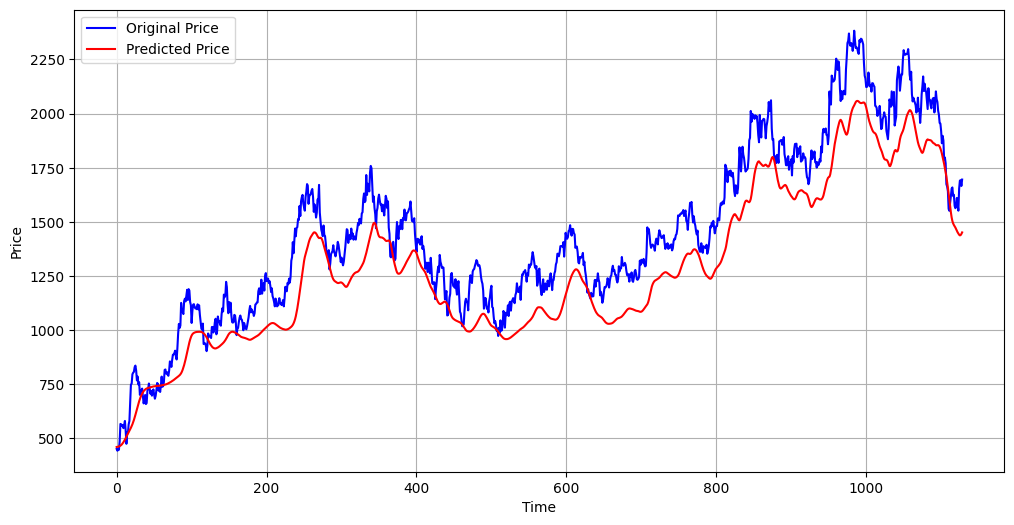

In [44]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
#Model evaluation
#Calculation of mean absolute error

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 11.31%


In [46]:
#Calculation of R2 score

from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.7834691821941387


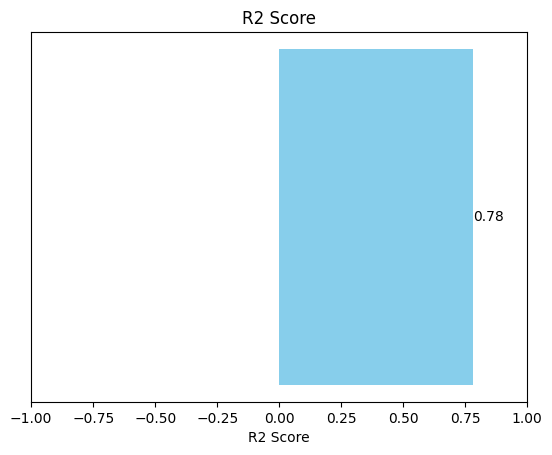

In [47]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

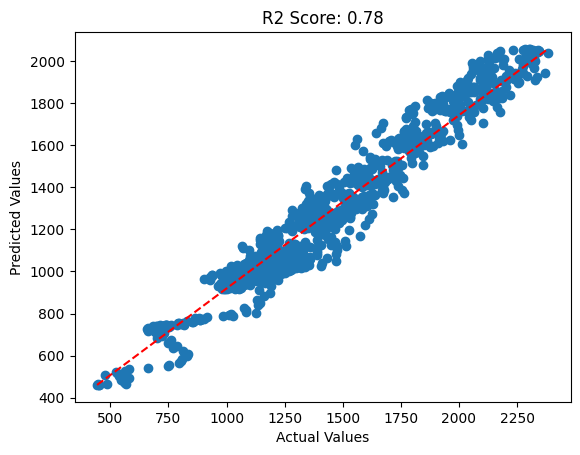

In [48]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()